In [102]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [103]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv').drop(columns=['Index'])
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv').drop(columns=['Index'])
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv').drop(columns=['Index'])
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv').drop(columns=['Index'])
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv').drop(columns=['Index'])
# df = df_all
# df.head()

In [104]:
# Shape of dataframe
# print(" Shape of dataframe: ", df.shape)
# Variable inspection
# print("Names of columns ", list(df.columns))

In [105]:
# Training the linear regression model for goalkeepers
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_gk.Overall
df_gk = df_gk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_gk, target, test_size=0.2)

# Model for goalkeepers
GKmodel = LinearRegression()
GKmodel.fit(X_train, y_train)
predictions = GKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9982124052225196
RMSE : 0.3272234207609803


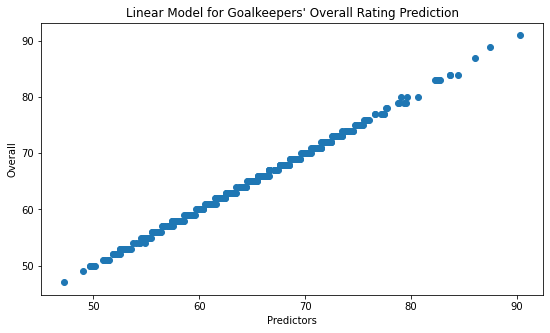

In [106]:
plt.figure(figsize=(9,5))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Goalkeepers' Overall Rating Prediction")
plt.show()

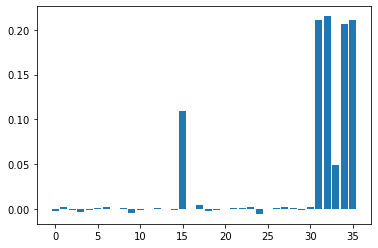

In [107]:
Y = GKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_gk), Y))
# print(coefs_attr)

In [108]:
# Training the linear regression model for backfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_bk.Overall
df_bk = df_bk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_bk, target, test_size=0.2)

# Model for midfielders
BKmodel = LinearRegression()
BKmodel.fit(X_train, y_train)
predictions = BKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9534190925153457
RMSE : 1.346374471161094


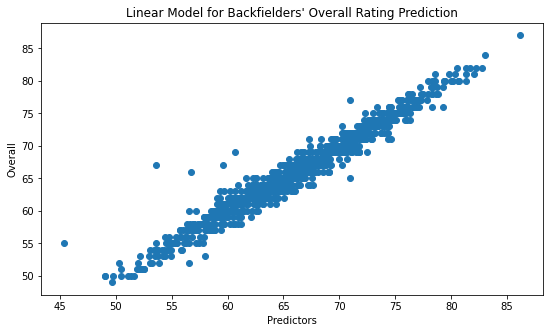

In [109]:
plt.figure(figsize=(9,5))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Backfielders' Overall Rating Prediction")
plt.show()

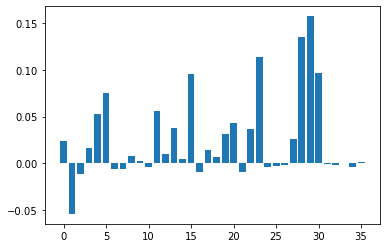

In [110]:
Y = BKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_bk), Y))
# print(coefs_attr)

In [111]:
# Training the linear regression model for midfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_md.Overall
df_md = df_md.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_md, target, test_size=0.2)

# Model for midfielders
MDmodel = LinearRegression()
MDmodel.fit(X_train, y_train)
predictions = MDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9342389083876242
RMSE : 1.7843129319673612


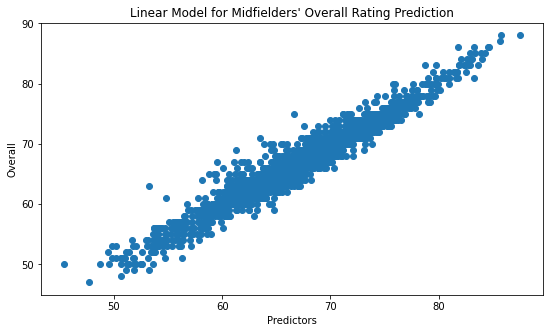

In [112]:
plt.figure(figsize=(9,5))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Midfielders' Overall Rating Prediction")
plt.show()

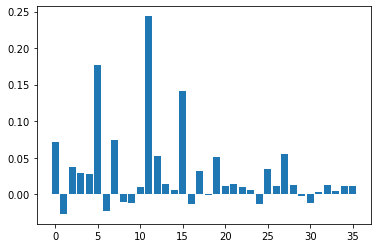

In [113]:
Y = MDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_md), Y))
# print(coefs_attr)

In [114]:
# Training the linear regression model for strikers / forwards
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_fwd.Overall
df_fwd = df_fwd.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_fwd, target, test_size=0.2)

# Model for strikers
FWDmodel = LinearRegression()
FWDmodel.fit(X_train, y_train)
predictions = FWDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9819823454661598
RMSE : 0.9956415787229422


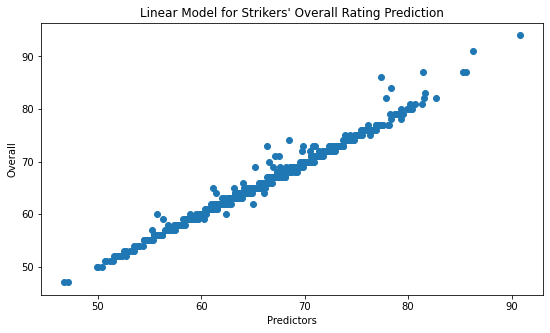

In [115]:
plt.figure(figsize=(9,5))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Strikers' Overall Rating Prediction")
plt.show()

{'Age': -0.0046522856345590615, 'Weak Foot': 0.016554330492787123, 'Crossing': 0.0016581756425798793, 'Finishing': 0.17709516908910114, 'HeadingAccuracy': 0.0709057013435991, 'ShortPassing': 0.05961703334107123, 'Volleys': 0.012778470067742138, 'Dribbling': 0.0725520468456809, 'Curve': -7.133662788512625e-05, 'FKAccuracy': 1.1702866272282036e-05, 'LongPassing': 0.0002141039956453838, 'BallControl': 0.11822930684081395, 'Acceleration': 0.03816327084884611, 'SprintSpeed': 0.0449092233508582, 'Agility': -0.00048332537067427366, 'Reactions': 0.08568742110754216, 'Balance': -0.002564413515966895, 'ShotPower': 0.09928491705904874, 'Jumping': 0.00033553246696031654, 'Stamina': 0.0006381730312348404, 'Strength': 0.04789913196921965, 'LongShots': 0.02970221756516691, 'Aggression': 0.001675458346064325, 'Interceptions': -0.001161040085477311, 'Positioning': 0.13185914537764298, 'Vision': 0.004458688033909272, 'Penalties': 0.0023043367777812905, 'Composure': 0.0059295892452359035, 'Marking': 0.00

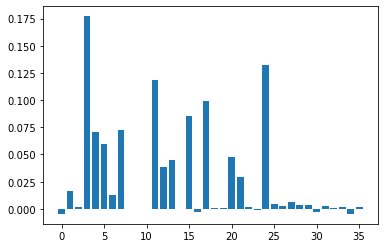

In [116]:
Y = FWDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_fwd), Y))
print(coefs_attr)